This example is derived from: https://cellpose.readthedocs.io/en/latest/notebook.html

In [1]:
import rand_cmap
new_cmap = rand_cmap.rand_cmap(1000, type='bright', first_color_black=True, last_color_black=False, verbose=False)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread

# model_type='cyto' or 'nuclei' or 'cyto2'
# model = models.Cellpose(model_type='nuclei')
model = models.CellposeModel(pretrained_model='./models/cellpose/cellpose_residual_on_style_on_concatenation_off_train_2022_10_31_22_08_39.685842')


# list of files
# PUT PATH TO YOUR FILES HERE!
files = ['test.tif']

imgs = [imread(f) for f in files]
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles = model.eval(imgs, diameter=None, channels=channels)

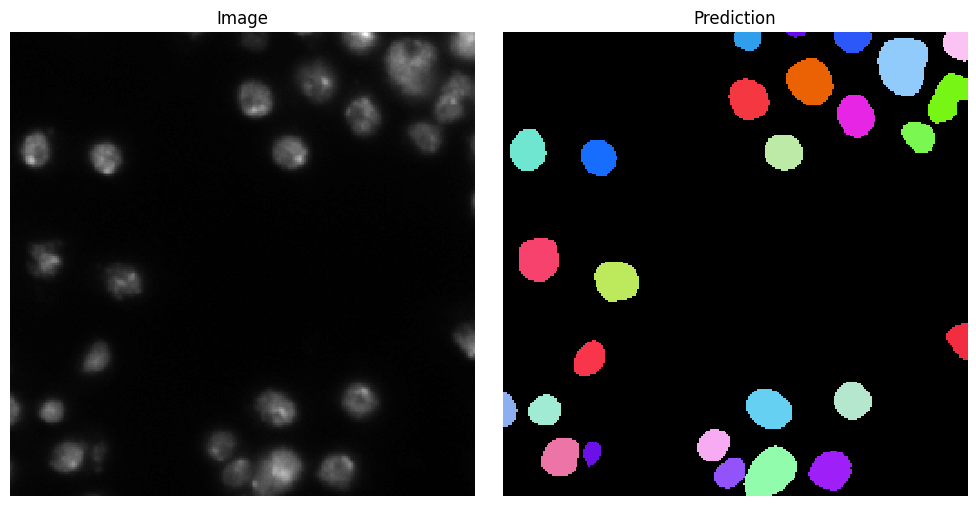

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(imgs[0], cmap=plt.get_cmap('gray'), interpolation="nearest")
axes[0].axis("off")
axes[0].set_title("Image")
axes[1].imshow(masks[0], cmap=new_cmap, interpolation="nearest")
axes[1].axis("off")
axes[1].set_title("Prediction")
fig.tight_layout()